In [1]:
%autosave 30

Autosaving every 30 seconds


In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

### # Simple Moving Average (SMA):

In [3]:
df = pd.DataFrame([12, 13, 15, 17, 11, 12, 5])
df

,0
0,12
1,13
2,15
3,17
4,11
5,12
6,5


In [4]:
## Compute SMA for window size = 5

sma_5 = df.rolling(5).mean()
df["SMA (window=5)"] = sma_5
df

,0,SMA (window=5)
0,12,NaN
1,13,NaN
2,15,NaN
3,17,NaN
4,11,13.6
5,12,13.6
6,5,12.0


#### Set, min_periods = 1

In [5]:
## SMA fr window=5, min_periods=1

sma_5_2 = df[0].rolling(window=5, min_periods=2).mean()
df["SMA (window=5, min_periods=2)"] = sma_5_2
df

,0,SMA (window=5),"SMA (window=5, min_periods=2)"
0,12,NaN,NaN
1,13,NaN,12.500000
2,15,NaN,13.333333
3,17,NaN,14.250000
4,11,13.6,13.600000
5,12,13.6,13.600000
6,5,12.0,12.000000


### # Cumulative Moving Average:

- We get even more smoother curve than we got through SMA.
- found via `.expanding()`.

In [6]:
df["CMA"] = df[0].expanding().mean()
df

,0,SMA (window=5),"SMA (window=5, min_periods=2)",CMA
0,12,NaN,NaN,12.000000
1,13,NaN,12.500000,12.500000
2,15,NaN,13.333333,13.333333
3,17,NaN,14.250000,14.250000
4,11,13.6,13.600000,13.600000
5,12,13.6,13.600000,13.333333
6,5,12.0,12.000000,12.142857


### TSLA:

In [7]:
## Load the TSLA dataset
tsla = pdr.get_data_yahoo('TSLA')

## Keep only dates in "Date" feature
tsla = tsla.reset_index()
tsla.Date = pd.to_datetime(pd.to_datetime(tsla.Date).dt.date)
print(tsla.dtypes)
tsla.set_index("Date", inplace=True)
tsla

[*********************100%***********************]  1 of 1 completed
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800


### Smoothened Curve through SMA

<AxesSubplot:xlabel='Date'>

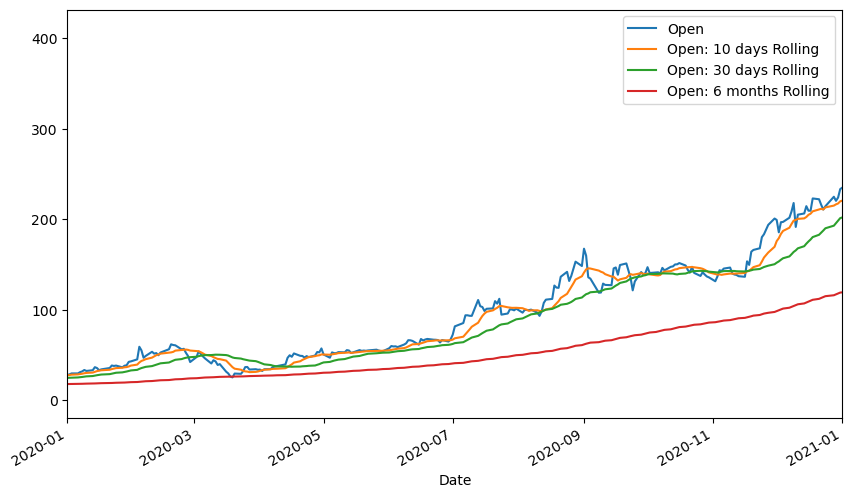

In [8]:
## Plot a smoothened curve of the "Open" feature

sma_10 = tsla['Open'].rolling(10, min_periods=1).mean()
sma_30 = tsla['Open'].rolling(30, min_periods=1).mean()
sma_180 = tsla['Open'].rolling(180, min_periods=1).mean()

tsla["Open: 10 days Rolling"] = sma_10
tsla["Open: 30 days Rolling"] = sma_30
tsla["Open: 6 months Rolling"] = sma_180

tsla[["Open", "Open: 10 days Rolling", "Open: 30 days Rolling", 
      "Open: 6 months Rolling"]].plot(figsize=(10, 6), xlim=['2020-01-01', '2021-01-01'])

### Even more Smoothened Curve through CMA

<AxesSubplot:xlabel='Date'>

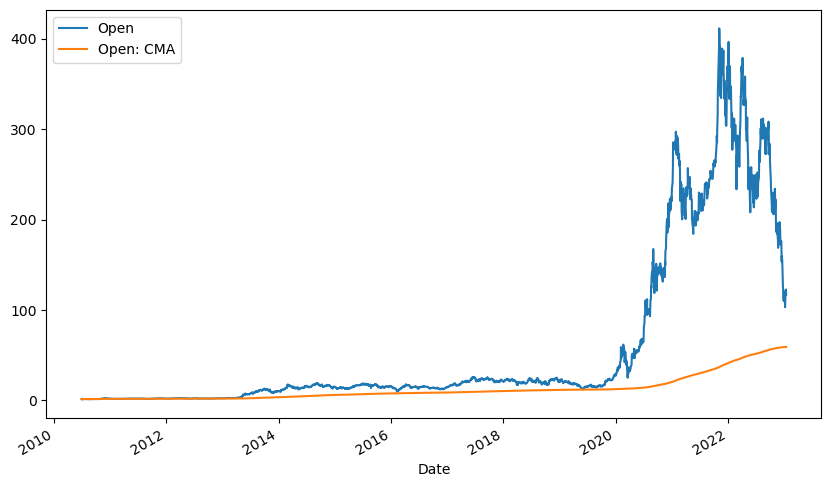

In [9]:
## Plot an even more smoothened "Open" TSLA curve

tsla["Open: CMA"] = tsla["Open"].expanding().mean()
tsla[["Open", "Open: CMA"]].plot(figsize=(10, 6))

### # EWMA (Exponentially Weighted Moving Average):

Unlike SMAs, in `EWMAs` more weights are applied to more recent data points, making them more relevant for future forecasts.

They are specifically used to prevent lags that were there when we're using SMAs.

### `EWMA(t) = a*x(t) + (1-a)EWMA(t-1)`

In [11]:
## tsla shares using EWA
# Smoothening factor = 0.1

tsla["Open: EMA_0.1"] = tsla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

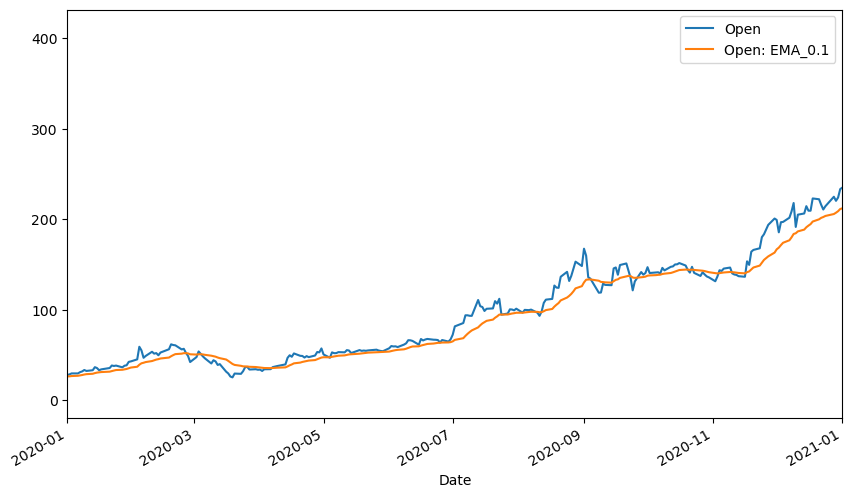

In [14]:
## Plot EMA

tsla[['Open', 'Open: EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(10, 6))

#### for alpha=0.3

<AxesSubplot:xlabel='Date'>

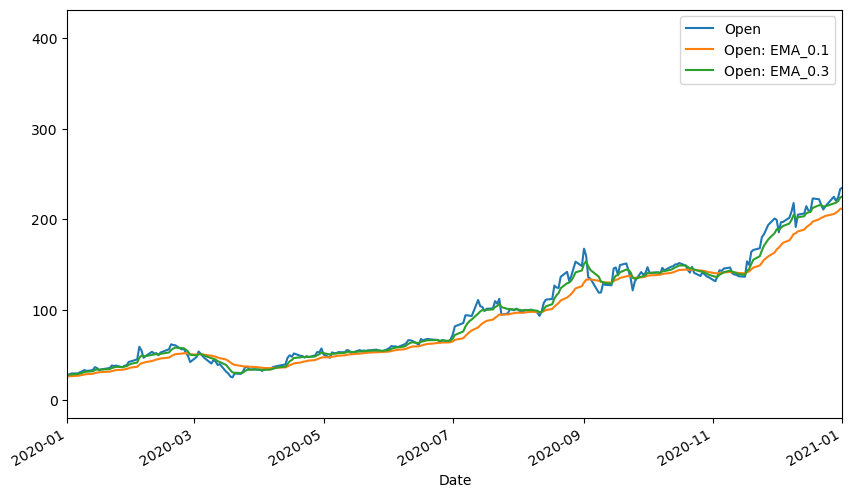

In [15]:
# Smoothening factor = 0.1

tsla["Open: EMA_0.3"] = tsla['Open'].ewm(alpha=0.3, adjust=False).mean()
tsla[['Open', 'Open: EMA_0.1', 'Open: EMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(10, 6))

**=>** Green curve (EMA_0.3) is more towardly to the original curve.

<AxesSubplot:xlabel='Date'>

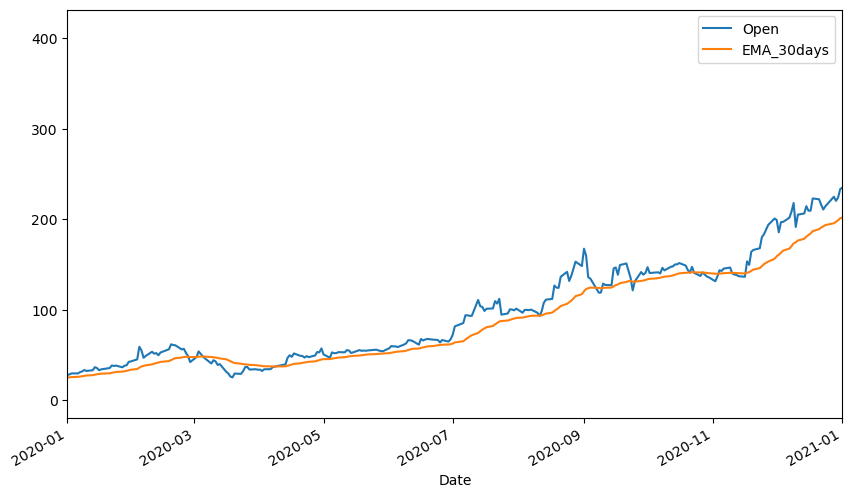

In [20]:
## EWMA using span, span is deacay/window size
# alpha = 2/(span + 1)

tsla['EMA_30days'] = tsla['Open'].ewm(span=30).mean()
tsla[['Open', 'EMA_30days']].plot(figsize=(10, 6), xlim=['2020-01-01', '2021-01-01'])